In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
fights = pd.read_csv('merged_fighters.csv')
fights.head()

,Unnamed: 0,w_l,round,time,event,date,location,fighter1,fighter2,kd_f1,kd_f2,str_f1,str_f2,td_f1,td_f2,sub_f1,sub_f2,ht_f1,ht_f2,wt_f1,wt_f2,reach_f1,reach_f2,w_f1,w_f2,l_f1,l_f2,d_f1,d_f2,belt_f1,belt_f2,country_f1,country_f2,age_in_2023_f1,age_in_2023_f2,active_f1,active_f2,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,Orthodox_f1,Southpaw_f1,Switch_f1,Orthodox_f2,Southpaw_f2,Switch_f2,ko,dec,overturned,sub,win_percentage_f1,win_percentage_f2,sig_str_pm,str_acc_percentage,str_abs_pm,str_def_percentage,td_avg_15m,td_acc_percentage,td_def_percentage,sub_avg_15m,sig_str_pm_f2,str_acc_percentage_f2,str_abs_pm_f2,str_def_percentage_f2,td_avg_15m_f2,td_acc_percentage_f2,td_def_percentage_f2,sub_avg_15m_f2,winner
0,1,win,3,5:00,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Rafael Fiziev,Justin Gaethje,0,0,137,145,0,0,0,0,66.0,64.0,125.0,125.0,69.0,64.0,9,21,1,9,0,1,0,0,KGZ,USA,31.0,31.0,True,True,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.900000,0.677419,5.06,0.51,5.17,0.48,0.31,0.40,0.90,0.0,7.38,0.60,7.66,0.53,0.13,0.25,0.75,0.0,Justin Gaethje
1,3,win,2,4:27,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Jennifer Maia,Casey O'Neill,0,0,28,10,1,1,1,0,68.0,70.0,135.0,145.0,71.0,72.0,17,17,1,9,0,0,0,0,BRA,CZE,31.0,27.0,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.944444,0.653846,4.50,0.38,4.78,0.55,0.27,0.21,0.57,0.1,8.77,0.55,5.90,0.58,1.96,0.42,0.71,0.7,Jennifer Maia
2,4,win,3,5:00,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Marvin Vettori,Roman Dolidze,0,0,53,47,5,0,0,0,70.0,71.0,155.0,155.0,71.0,73.0,10,11,1,4,0,0,0,0,ITA,GEO,27.0,29.0,False,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.909091,0.733333,4.56,0.45,4.24,0.56,1.66,0.45,0.69,0.5,3.02,0.44,3.01,0.55,1.72,0.50,0.33,1.7,Marvin Vettori
3,5,win,3,4:32,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Makwan Amirkhani,Jack Shore,0,0,9,16,0,4,2,2,67.0,67.0,125.0,125.0,68.0,7.0,14,10,3,0,0,0,0,0,FIN,WAL,31.0,29.0,False,True,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.823529,1.000000,1.33,0.44,2.98,0.46,3.96,0.43,0.35,1.1,3.84,0.58,2.20,0.57,3.42,0.40,0.79,0.7,Jack Shore
4,10,win,5,5:00,UFC 286: Edwards vs. Usman 3,03/11/23,"London, England, United Kingdom",Malcolm Gordon,Jake Hadley,0,0,75,147,1,11,0,0,67.0,66.0,135.0,135.0,67.0,68.0,16,16,5,4,0,0,1,0,CAN,ENG,29.0,27.0,True,True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.761905,0.800000,1.93,0.42,2.26,0.42,1.61,0.30,0.09,0.8,4.21,0.48,3.52,0.62,0.47,1.00,0.37,1.9,Jake Hadley


In [3]:
#now, since we will be using the winner column to predict, we need to one-hot encode it
#first we need to change the winner column from the name of the winner to fighter1 or fighter2 (or draw/ no-contest)
fights['winner'] = fights.apply(lambda row: 'fighter1_wins' if row['winner'] == row['fighter1'] else ('fighter2_wins' if row['winner'] == row['fighter2'] else row['winner']), axis=1)

#then, we'll one-hot encode the winner column!
fights_pp = pd.get_dummies(fights['winner'])
fights = pd.concat([fights, fights_pp], axis=1)
#fights = fights.drop('winner', axis=1)


In [4]:
#for the sake of our model, let's simplify our results and get rid of fights that ended 'no contest' and 'draw'
#no contest is when a fight is not able to be completed and there are only a few instances in our data

fights = fights.drop(fights[fights['winner'] == 'nc nc'].index)
fights = fights.drop(fights[fights['winner'] == 'draw'].index)

#we can also delete all the other unnecessary columns along with it
fights = fights.drop(['Unnamed: 0', 'w_l'], axis=1)

fights.head()

,round,time,event,date,location,fighter1,fighter2,kd_f1,kd_f2,str_f1,str_f2,td_f1,td_f2,sub_f1,sub_f2,ht_f1,ht_f2,wt_f1,wt_f2,reach_f1,reach_f2,w_f1,w_f2,l_f1,l_f2,d_f1,d_f2,belt_f1,belt_f2,country_f1,country_f2,age_in_2023_f1,age_in_2023_f2,active_f1,active_f2,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,Orthodox_f1,Southpaw_f1,Switch_f1,Orthodox_f2,Southpaw_f2,Switch_f2,ko,dec,overturned,sub,win_percentage_f1,win_percentage_f2,sig_str_pm,str_acc_percentage,str_abs_pm,str_def_percentage,td_avg_15m,td_acc_percentage,td_def_percentage,sub_avg_15m,sig_str_pm_f2,str_acc_percentage_f2,str_abs_pm_f2,str_def_percentage_f2,td_avg_15m_f2,td_acc_percentage_f2,td_def_percentage_f2,sub_avg_15m_f2,winner,draw,fighter1_wins,fighter2_wins,nc nc
0,3,5:00,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Rafael Fiziev,Justin Gaethje,0,0,137,145,0,0,0,0,66.0,64.0,125.0,125.0,69.0,64.0,9,21,1,9,0,1,0,0,KGZ,USA,31.0,31.0,True,True,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.900000,0.677419,5.06,0.51,5.17,0.48,0.31,0.40,0.90,0.0,7.38,0.60,7.66,0.53,0.13,0.25,0.75,0.0,fighter2_wins,0,0,1,0
1,2,4:27,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Jennifer Maia,Casey O'Neill,0,0,28,10,1,1,1,0,68.0,70.0,135.0,145.0,71.0,72.0,17,17,1,9,0,0,0,0,BRA,CZE,31.0,27.0,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.944444,0.653846,4.50,0.38,4.78,0.55,0.27,0.21,0.57,0.1,8.77,0.55,5.90,0.58,1.96,0.42,0.71,0.7,fighter1_wins,0,1,0,0
2,3,5:00,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Marvin Vettori,Roman Dolidze,0,0,53,47,5,0,0,0,70.0,71.0,155.0,155.0,71.0,73.0,10,11,1,4,0,0,0,0,ITA,GEO,27.0,29.0,False,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0.909091,0.733333,4.56,0.45,4.24,0.56,1.66,0.45,0.69,0.5,3.02,0.44,3.01,0.55,1.72,0.50,0.33,1.7,fighter1_wins,0,1,0,0
3,3,4:32,UFC 286: Edwards vs. Usman 3,03/18/23,"London, England, United Kingdom",Makwan Amirkhani,Jack Shore,0,0,9,16,0,4,2,2,67.0,67.0,125.0,125.0,68.0,7.0,14,10,3,0,0,0,0,0,FIN,WAL,31.0,29.0,False,True,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.823529,1.000000,1.33,0.44,2.98,0.46,3.96,0.43,0.35,1.1,3.84,0.58,2.20,0.57,3.42,0.40,0.79,0.7,fighter2_wins,0,0,1,0
4,5,5:00,UFC 286: Edwards vs. Usman 3,03/11/23,"London, England, United Kingdom",Malcolm Gordon,Jake Hadley,0,0,75,147,1,11,0,0,67.0,66.0,135.0,135.0,67.0,68.0,16,16,5,4,0,0,1,0,CAN,ENG,29.0,27.0,True,True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0.761905,0.800000,1.93,0.42,2.26,0.42,1.61,0.30,0.09,0.8,4.21,0.48,3.52,0.62,0.47,1.00,0.37,1.9,fighter2_wins,0,0,1,0


In [5]:
test = pd.DataFrame(fights[['ht_f1', 'wt_f1','reach_f1', 'w_f1', 'l_f1', 'd_f1','belt_f1', 'sig_str_pm', 'str_acc_percentage',
                                                        'str_abs_pm', 'str_def_percentage', 'td_avg_15m', 'td_acc_percentage',
                                                        'td_def_percentage', 'sub_avg_15m','ht_f2', 'wt_f2','reach_f2', 'w_f2', 'l_f2', 'd_f2','belt_f2', 'sig_str_pm', 'str_acc_percentage',
                                                        'str_abs_pm_f2', 'str_def_percentage_f2', 'td_avg_15m_f2', 'td_acc_percentage_f2',
                                                        'td_def_percentage_f2', 'sub_avg_15m_f2','Bantamweight', 'Catch Weight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', "Women's Bantamweight",
       "Women's Featherweight", "Women's Flyweight", "Women's Strawweight"]])
test

,ht_f1,wt_f1,reach_f1,w_f1,l_f1,d_f1,belt_f1,sig_str_pm,str_acc_percentage,str_abs_pm,str_def_percentage,td_avg_15m,td_acc_percentage,td_def_percentage,sub_avg_15m,ht_f2,wt_f2,reach_f2,w_f2,l_f2,d_f2,belt_f2,sig_str_pm,str_acc_percentage,str_abs_pm_f2,str_def_percentage_f2,td_avg_15m_f2,td_acc_percentage_f2,td_def_percentage_f2,sub_avg_15m_f2,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,66.0,125.0,69.0,9,1,0,0,5.06,0.51,5.17,0.48,0.31,0.40,0.90,0.0,64.0,125.0,64.0,21,9,1,0,5.06,0.51,7.66,0.53,0.13,0.25,0.75,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,68.0,135.0,71.0,17,1,0,0,4.50,0.38,4.78,0.55,0.27,0.21,0.57,0.1,70.0,145.0,72.0,17,9,0,0,4.50,0.38,5.90,0.58,1.96,0.42,0.71,0.7,0,0,0,0,0,0,0,0,0,0,0,1,0
2,70.0,155.0,71.0,10,1,0,0,4.56,0.45,4.24,0.56,1.66,0.45,0.69,0.5,71.0,155.0,73.0,11,4,0,0,4.56,0.45,3.01,0.55,1.72,0.50,0.33,1.7,0,0,0,0,0,0,0,1,0,0,0,0,0
3,67.0,125.0,68.0,14,3,0,0,1.33,0.44,2.98,0.46,3.96,0.43,0.35,1.1,67.0,125.0,7.0,10,0,0,0,1.33,0.44,2.20,0.57,3.42,0.40,0.79,0.7,0,0,1,0,0,0,0,0,0,0,0,0,0
4,67.0,135.0,67.0,16,5,0,1,1.93,0.42,2.26,0.42,1.61,0.30,0.09,0.8,66.0,135.0,68.0,16,4,0,0,1.93,0.42,3.52,0.62,0.47,1.00,0.37,1.9,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,70.0,155.0,72.0,22,5,1,0,3.83,0.37,4.03,0.52,2.38,0.49,0.69,0.3,70.0,155.0,74.0,34,9,0,1,3.83,0.37,7.10,0.54,0.42,0.29,0.91,0.1,0,0,1,0,0,0,0,0,0,0,0,0,0
812,70.0,185.0,75.0,30,10,0,0,3.63,0.41,3.31,0.58,1.00,0.30,0.62,0.1,75.0,185.0,75.0,12,4,0,0,3.63,0.41,3.14,0.52,3.92,0.47,0.65,0.9,0,0,0,0,0,0,0,1,0,0,0,0,0
813,67.0,125.0,68.0,16,7,0,0,3.36,0.41,4.61,0.54,1.79,0.42,0.60,0.7,64.0,125.0,67.0,13,3,0,0,3.36,0.41,5.02,0.51,0.61,0.40,0.69,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
814,74.0,185.0,75.0,22,5,0,0,3.67,0.38,4.19,0.50,0.00,0.00,0.54,0.1,64.0,125.0,65.0,13,5,2,0,3.67,0.38,2.88,0.47,1.81,0.20,0.50,1.7,0,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
fights.shape

(797, 81)

In [7]:
fights = fights.dropna()
fights.shape

(747, 81)

In [9]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split dataset into features and target
y = fights['winner']
X = fights[['ht_f1', 'wt_f1','reach_f1', 'w_f1', 'l_f1', 'd_f1','belt_f1', 'sig_str_pm', 'str_acc_percentage',
                                                        'str_abs_pm', 'str_def_percentage',
                                                        'td_def_percentage', 'sub_avg_15m', 'win_percentage_f1','ht_f2', 'wt_f2','reach_f2', 'w_f2', 'l_f2', 'd_f2','belt_f2', 'sig_str_pm', 'str_acc_percentage',
                                                        'str_abs_pm_f2', 'str_def_percentage_f2',
                                                        'td_def_percentage_f2', 'sub_avg_15m_f2', 'win_percentage_f2','Bantamweight', 'Catch Weight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', "Women's Bantamweight",
       "Women's Featherweight", "Women's Flyweight", "Women's Strawweight", 'Orthodox_f1','Southpaw_f1', "Orthodox_f2", "Southpaw_f2"]]

# View count of each class
y.value_counts()

fighter2_wins    377
fighter1_wins    370
Name: winner, dtype: int64

In [16]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)

# View accuracy score
print(accuracy_score(y_test, y_pred_test))



0.7112299465240641


In [17]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[71, 22],
       [32, 62]], dtype=int64)

In [18]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))


               precision    recall  f1-score   support

fighter1_wins       0.69      0.76      0.72        93
fighter2_wins       0.74      0.66      0.70        94

     accuracy                           0.71       187
    macro avg       0.71      0.71      0.71       187
 weighted avg       0.71      0.71      0.71       187



Training score:  1.0
Accuracy score:  0.7165775401069518


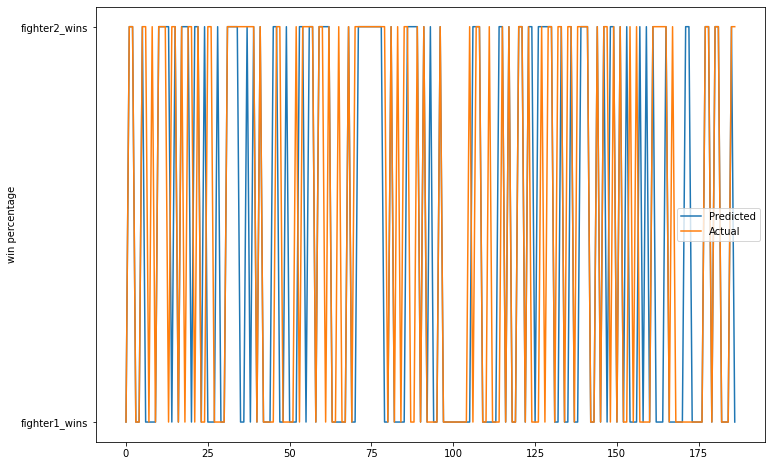

In [13]:
print("Training score: ", forest.score(X_train, y_train))
print("Accuracy score: ", accuracy_score(y_test, y_pred_test))

plt.figure(figsize = (12, 8))

plt.plot(y_pred_test, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('win percentage')

plt.legend()
plt.show()

In [19]:
#considering this is a random tree model, the perfect training score has nothing to do with overfitting
#source: https://towardsdatascience.com/one-common-misconception-about-random-forest-and-overfitting-47cae2e2c23b

In [20]:
#now let's save the model as a pickle file so we can put it to use!

import pickle

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(forest, file)